In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pwd

'C:\\Users\\Tran Tan Phong\\Term 7 - Code Seminar'

In [7]:
# file = 'urbanGB.txt'

# data = pd.read_table(file, delim_whitespace=True,names= ['X_1','X_2'] )

In [32]:
path = 'urbanGB.csv'
path_2 = 'urbanGB.labels.csv'
# path = 'https://raw.githubusercontent.com/pypluf/pypluf.github.Lab_1/master/Lab1/Py4DS_Lab1_Dataset/diabetes.csv'
df = pd.read_csv(path)
labels = pd.read_csv(path_2)
df.head()

,-0.31099,53.7802
0,-3.112550,55.8706
1,-0.088533,51.3806
2,-0.326795,51.4476
3,-3.946530,51.6594
4,-0.447304,50.8153


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360176 entries, 0 to 360175
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   -0.31099  360176 non-null  float64
 1   53.7802   360176 non-null  float64
dtypes: float64(2)
memory usage: 5.5 MB


In [34]:
df.shape

(360176, 2)

In [35]:
X = df.to_numpy()
y = labels.to_numpy()

In [36]:
y = np.reshape(y,360176)

In [37]:
# Standardize features
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(df)

In [43]:
# Encode categorical class labels
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(y)

In [44]:
# Construct Within-class covariance matrix S_W
S_W = np.zeros((2,2))
for i in range(469):
    S_W += np.cov(X_train_std[y==i].T)
print('Within-class covariance matrix')    
print(S_W)

Within-class covariance matrix
[[ 0.21954654 -0.01184064]
 [-0.01184064  0.05834149]]


In [46]:
# Construct between-class scatter matrix S_B
N=np.bincount(y) # number of samples for given class
vecs=[]
[vecs.append(np.mean(X_train_std[y==i],axis=0)) for i in range(469)] # class means
mean_overall = np.mean(X_train_std, axis=0) # overall mean
S_B=np.zeros((2,2))
for i in range(469):
    S_B += N[i]*(((vecs[i]-mean_overall).reshape(2,1)).dot(((vecs[i]-mean_overall).reshape(1,2))))

In [47]:
print('between-class scatter matrix') 
print(S_B)

between-class scatter matrix
[[ 357564.09506394 -180537.81311318]
 [-180537.81311318  359503.68416592]]


In [48]:
# Calculate sorted eigenvalues and eigenvectors of inverse(S_W)dot(S_B)
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

6345912.497726906
1193533.0136597287


In [49]:
print('Trị riêng : \n {}'.format(eigen_vals))
print('\n')
print('Vecto riêng : \n {}'.format(eigen_vecs))
# Sắp xếp các trị riêng theo thứ tự giảm dần
sort_index1 = np.argsort(eigen_vals)[::-1]
sort_eigen_vals = eigen_vals[sort_index1]
# Sắp xếp các vector riêng tương ứng với trị riêng đó
sort_eigen_vecs = eigen_vecs[:,sort_index1]

Trị riêng : 
 [1193533.01365973 6345912.49772691]


Vecto riêng : 
 [[-0.86725558  0.10124621]
 [-0.4978632  -0.9948614 ]]


In [52]:
# Project original features onto the new feature space
W=np.hstack((eigen_pairs[0][1][:, ].reshape(2,1),eigen_pairs[1][1][:, ].reshape(2,1))).real
X_train_lda = X_train_std.dot(W*-1)

In [53]:
#Transformed features in LDA subspace
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,2.524518,0.084474,279
1,-0.955917,0.435558,0
2,-0.889238,0.304034,0
3,-0.459641,-1.986070,266
4,-1.337661,-0.003773,311


In [78]:
# for color, i, target_name in zip(colors, a, target_names):
#     plt.scatter(X_train_lda[y == i, 0], X_train_lda[y == i, 1], color=color, alpha=.8, lw=2,
#                 label=target_name)
# plt.legend(loc='best', shadow=False, scatterpoints=1)
# plt.title('LDA of IRIS dataset - step by step')

# plt.show()

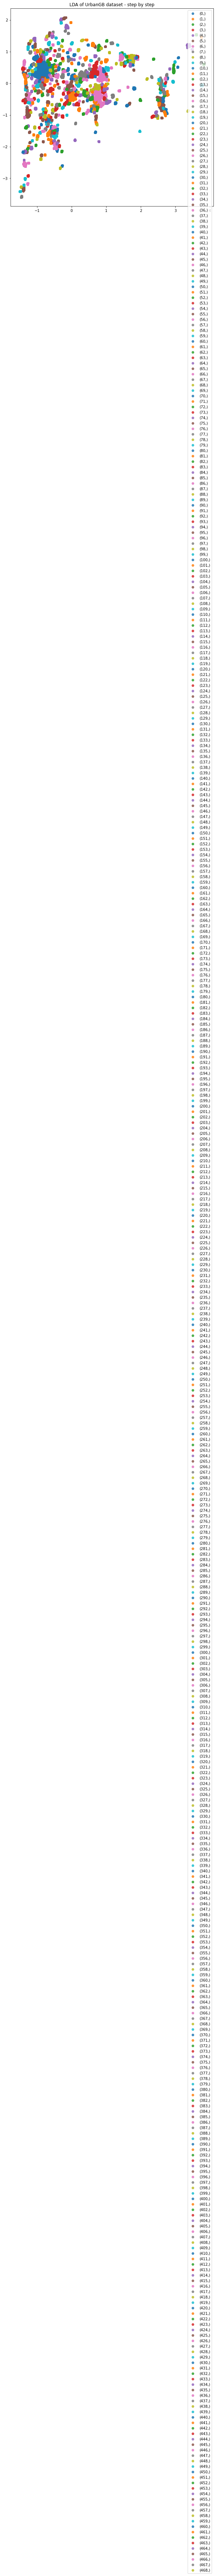

In [86]:
a = list(range(0,469))
plt.figure(figsize=(10,10))
for  i in zip(a):
    plt.scatter(X_train_lda[y == i, 0], X_train_lda[y == i, 1], alpha=0.8, lw=1, label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of UrbanGB dataset - step by step')

plt.show()